In [13]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
from PIL import Image
import cv2

Loading Model

In [14]:
model = tf.keras.models.load_model('trained_model.keras')

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

## Visualizing Single Image of Test set

In [16]:
!pip install opencv-python

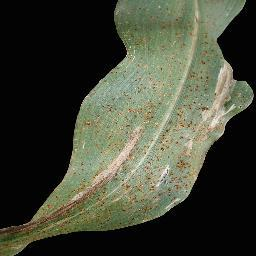

In [17]:
# Read and convert image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ✅ Display using PIL (safe in Jupyter)
display(Image.fromarray(img))

## Testing Model

In [18]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [19]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 93ms/step


(array([[6.1924016e-10, 2.4883918e-11, 2.7301775e-10, 2.0819794e-10,
         1.2035669e-11, 4.8945258e-12, 3.3807478e-13, 2.7546587e-09,
         9.9998677e-01, 5.5543076e-10, 2.7114937e-11, 1.3844794e-13,
         2.0890749e-11, 3.5605999e-13, 8.8907844e-14, 5.4714662e-12,
         1.4007847e-11, 5.9735645e-12, 2.1759486e-10, 1.5627263e-08,
         1.3946113e-06, 4.3103915e-12, 2.7586217e-10, 4.6400441e-14,
         2.7385741e-14, 4.9017752e-12, 1.2408797e-11, 5.6145552e-16,
         9.3422926e-13, 3.1507082e-07, 1.1514996e-05, 5.8484350e-12,
         9.6232666e-10, 4.0884210e-16, 2.6211303e-12, 3.5442488e-14,
         4.4709086e-14, 1.1417268e-11]], dtype=float32),
 (1, 38))

In [20]:
result_index = np.argmax(prediction)

In [21]:

class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']



In [22]:
# Get prediction label
model_prediction = class_name[result_index]
print(f"\n✅ Predicted Disease: {model_prediction}")

# ✅ Optional: show prediction over image using PIL
import PIL.ImageDraw, PIL.ImageFont

# Resize image and convert to PIL
final_img = Image.fromarray(cv2.resize(img, (500, 500)))
draw = PIL.ImageDraw.Draw(final_img)
draw.text((10, 10), f"Disease: {model_prediction}", fill=(0, 255, 0))


✅ Predicted Disease: Corn_(maize)___Common_rust_


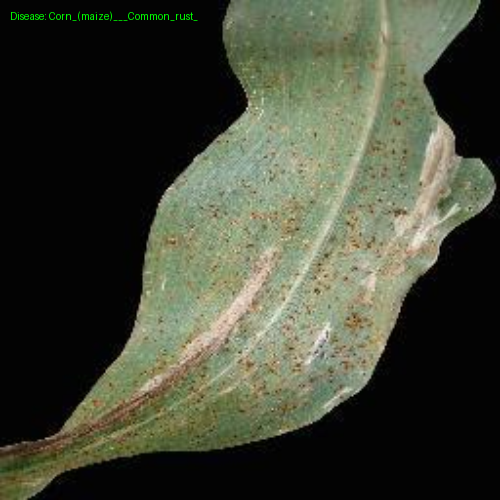

In [23]:
# Display final result
display(final_img)